2021-07-11 15:39:55 Processing chunk...
2021-07-11 15:39:55   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1)... (0.0 seconds)
2021-07-11 15:39:55   * Creating simulation 0 from source 0... (0.0 seconds)
2021-07-11 15:39:55   * Evaluating learner 0 on Simulation 0... (0.04 seconds)
2021-07-11 15:40:32   * Evaluating learner 1 on Simulation 0... (36.7 seconds)
2021-07-11 15:40:32   * Evaluating learner 2 on Simulation 0... (0.3 seconds)


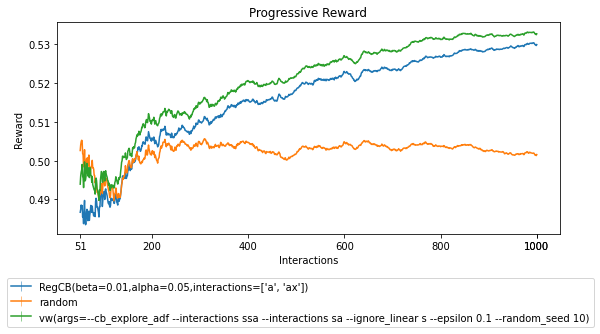

In [2]:
"""
This is an example script that creates a Benchmark.
This script requires that the matplotlib and vowpalwabbit packages be installed.
"""

from coba.environments.core import LambdaSimulation, ValidationSimulation
from coba.random import seed
from pathlib import Path

from coba.learners import RandomLearner, EpsilonBanditLearner, VowpalLearner, UcbBanditLearner, CorralLearner, RegCB
from coba.benchmarks import Benchmark

#this line is required by Python in order to use multi-processing
if __name__ == '__main__':

    true_theta = [10, -2, 30]
    import random
    import numpy as np

    context = lambda r, i : None
    actions = lambda r, i, c : ( (1, 3, 4), (5, 6, 8), (1, 2, 3) )
    rewards = lambda r, i, c, a : np.dot(a, true_theta)

    #First, we define the learners that we want to test
    learners = [
        RandomLearner(),
        RegCB(beta=.01, alpha=0.05),
        VowpalLearner(epsilon=.1, seed=10), #This learner requires that VowpalWabbit be installed
    ]

    #Then we create our benchmark from the benchmark configuration file
    benchmark = Benchmark([ValidationSimulation(1000,context_features=True,action_features=True, sparse=True)]).evaluate(learners) #shuffle=[1, 2, 3, 4, 5]
    benchmark.plot_learners()
    